##### threading 多執行緒處理
Python 在執行時，通常是採用同步的任務處理模式 ( 一個處理完成後才會接下去處理第二個 )，然而 Python 的標準函式「threading」\
採用「執行緒」的方式，運用多個執行緒，在同一時間內處理多個任務 ( 非同步 )，這篇教學會介紹 threading 的用法。

##### 同步與非同步 
同步和非同步的常見說法是：「同步模式下，每個任務必須按照順序執行，後面的任務必須等待前面的任務執行完成，在非同步模式下，\
後面的任務不用等前面的，各自執行各自的任務」，也可以想像成「同一個步道 vs 不同步道」，透過步道的方式，會更容易明白同步和\
非同步。( 因為有時會將同步與非同步的中文字面意思，想成「一起走」或「不要一起走」，很容易搞錯 )

* 同步：「同一個步道」，只能依序排隊前進。
* 非同步：「不 ( 非 ) 同步道」，可以各走各的。

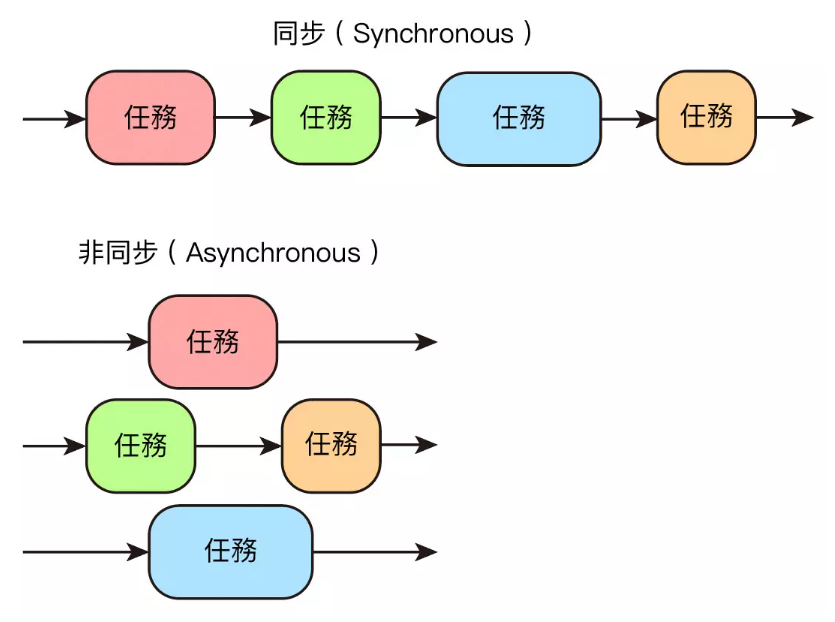

##### import threading 
要使用 threading 必須先 import threading 函式庫。

更多資訊可以參考 Python 官方文件：[threading](https://docs.python.org/zh-tw/3/library/threading.html)

In [ ]:
import threading

##### 有沒有使用 threading 的差異 
在沒有使用 threading 的狀況下，如果不同的函式裡都有「迴圈」，則迴圈的執行會按照函式執行的順序進行，\
以下方的程式碼為例，執行後會先印出 aa() 函式的迴圈內容，執行完畢再印出 bb() 函式的迴圈內容。

In [ ]:
import time

def aa():
    i = 0
    while i<5:
        i = i + 1
        time.sleep(0.5)
        print('A:', i)

def bb():
    i = 0
    while i<50:
        i = i + 10
        time.sleep(0.5)
        print('B:', i)

aa()    # 先執行 aa()
bb()    # aa() 結束後才會執行 bb()

'''
A: 1
A: 2
A: 3
A: 4
A: 5
B: 10
B: 20
B: 30
B: 40
B: 50
'''

如果有使用 threading，則兩個函式就可以同時運作 ( 雖然是同時，但底層仍然是有幾毫秒的執行順序 )

In [ ]:
import threading
import time

def aa():
    i = 0
    while i<5:
        i = i + 1
        time.sleep(0.5)
        print('A:', i)

def bb():
    i = 0
    while i<50:
        i = i + 10
        time.sleep(0.5)
        print('B:', i)

a = threading.Thread(target=aa)  # 建立新的執行緒
b = threading.Thread(target=bb)  # 建立新的執行緒

a.start()  # 啟用執行緒
b.start()  # 啟用執行緒

'''
A: 1
B: 10
A: 2
B: 20
A: 3
B: 30
A: 4
B: 40
A: 5
'''

##### threading 基本用法 
建立 threading 的方法如下：

In [ ]:
thread = threading.Thread(target=function, args)
# function 要在執行緒裡執行的函式
# args 函式所需的引數，使用 tuple 格式，如果只有一個參數，格式 (參數,)

建立 threading 之後，就可以使用下列常用的方法：

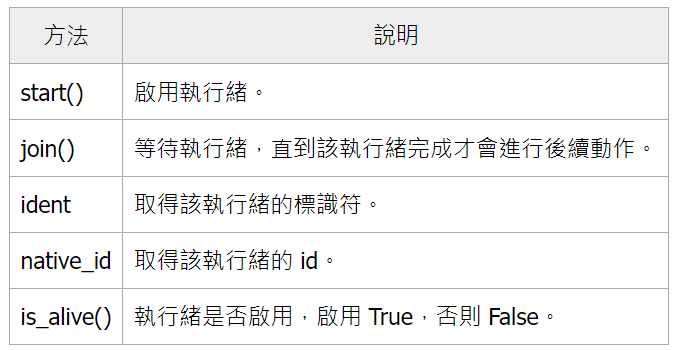

下方的程式碼執行後，會將 aa()、bb() 和 cc() 三個函式分別建立為執行緒，接著當使用 a.start() 和 b.start() 方法啟用後，\
因為有加入 a.join() 和 b.join() 的等待方法，所以 c.start() 會在 aa() 與 bb() 執行完成後，才會啟用。

In [ ]:
import threading
import time

def aa():
    i = 0
    while i<5:
        i = i + 1
        time.sleep(0.5)
        print('A:', i)

def bb():
    i = 0
    while i<50:
        i = i + 10
        time.sleep(0.5)
        print('B:', i)

def cc():
    i = 0
    while i<500:
        i = i + 100
        time.sleep(0.5)
        print('C:', i)

a = threading.Thread(target=aa)
b = threading.Thread(target=bb)
c = threading.Thread(target=cc)

a.start()
b.start()
a.join()   # 加入等待 aa() 完成的方法
b.join()   # 加入等待 bb() 完成的方法
c.start()  # 當 aa() 與 bb() 都完成後，才會開始執行 cc()

'''
A: 1
B: 10
A: 2
B: 20
A: 3
B: 30
A: 4
B: 40
A: 5
B: 50
C: 100 <--- A B 都結束後才開始
C: 200
C: 300
C: 400
C: 500
'''

如果只加入 a.join() 而不加入 b.join()，則 cc() 會在 aa() 執行結束就開始。

In [ ]:
import time

def aa():
    i = 0
    while i<5:
        i = i + 1
        time.sleep(0.5)
        print('A:', i)

def bb():
    i = 0
    while i<100:
        i = i + 10
        time.sleep(0.5)
        print('B:', i)

def cc():
    i = 0
    while i<500:
        i = i + 100
        time.sleep(0.5)
        print('C:', i)

a = threading.Thread(target=aa)
b = threading.Thread(target=bb)
c = threading.Thread(target=cc)

a.start()
b.start()
a.join()   # 加入等待 aa() 完成的方法
c.start()  # 當 aa() 完成後，就會開始執行 cc()

'''
A: 1
B: 10
A: 2
B: 20
A: 3
B: 30
A: 4
B: 40
A: 5
B: 50
C: 100 <--- A 結束就開始
B: 60
C: 200
B: 70
C: 300
B: 80
C: 400
B: 90
C: 500
B: 100
'''

##### Lock() 鎖定 
使用 threading 建立執行緒後，可以使用 Lock() 方法建立一個執行緒的「鎖」，當 Lock 建立後，就能使用 acquire() 方法鎖定，\
使用 release() 方法解除鎖定，如果有多個執行緒共用同一個 Lock，則同一時間只會執行第一個鎖定的執行緒，其他的執行緒要\
等到解鎖才能夠執行。

以下方的程式碼為例，會先使用 threading.Lock() 建立一個 Lock，當 aa() 和 bb() 執行時會先使用 lock.acquire() 進行鎖定\
( 以執行的順序表示誰先鎖定 )，因為 aa() 比較先執行所以會先鎖定，接著當 aa() 裡的 i 等於 2 時使用 lock.release() 解除\
鎖定，這時 bb() 就可以開始執行。

In [ ]:
import threading
import time

def aa():
    lock.acquire()         # 鎖定
    i = 0
    while i<5:
        i = i + 1
        time.sleep(0.5)
        print('A:', i)
        if i==2:
            lock.release()  # i 等於 2 時解除鎖定

def bb():
    lock.acquire()          # 鎖定
    i = 0
    while i<50:
        i = i + 10
        time.sleep(0.5)
        print('B:', i)
    lock.release()

lock = threading.Lock()         # 建立 Lock
a = threading.Thread(target=aa)
b = threading.Thread(target=bb)

a.start()
b.start()

'''
A: 1
A: 2
B: 10
A: 3
B: 20
A: 4
B: 30
A: 5
B: 40
B: 50
'''

##### Event() 事件處理 
threading 除了基本的多執行續功能，也提供 Event() 事件處理的方法，透過「事件」的方式，就能讓不同的執行續之間彼此溝通，\
也能輕鬆做到「等待 A 執行緒完成某件事後，B 執行緒再繼續」的功能，事件的處理包含下方幾種方法：

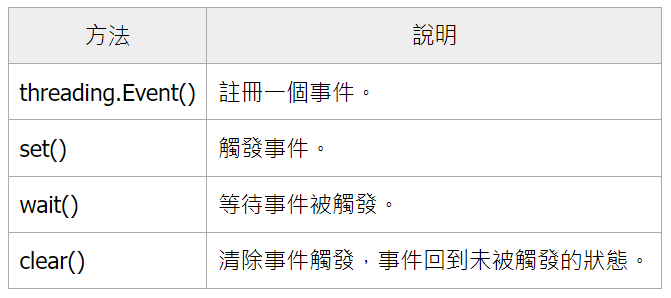

下方的程式碼執行後，會註冊一個 event 事件，當 aa() 執行時使用 event.wait() 等待事件被觸發，接著設定 bb() 執行到 i 等\
於 30 的時候就會觸發事件，這時 aa() 才會開始運作。

In [ ]:
import threading
import time

def aa():
    event.wait()            # 等待事件被觸發
    event.clear()           # 觸發後將事件回歸原本狀態
    for i in range(1,6):
        print('A:',i)
        time.sleep(0.5)

def bb():
    for i in range(10,60,10):
        if i == 30:
            event.set()     # 觸發事件
        print('B:',i)
        time.sleep(0.5)

event = threading.Event()   # 註冊事件
a = threading.Thread(target=aa)
b = threading.Thread(target=bb)

a.start()
b.start()

'''
B: 10
B: 20
B: 30
A: 1
B: 40
A: 2
B: 50
A: 3
A: 4
A: 5
'''

下方的程式碼註冊了兩個事件，event_a 會在輸入任意內容後觸發，觸發後就會印出 1～5 的數字，印出完成後會觸發 event_b，\
這時才又可以繼續輸入文字，不斷重複兩個事件的觸發與執行續的執行。

In [ ]:
import threading
import time

def aa():
    i = 0
    while True:
        event_a.wait()        # 等待 event_a 被觸發
        event_a.clear()       # 還原 event_a 狀態
        for i in range(1,6):
            print(i)
            time.sleep(0.5)
        event_b.set()         # 觸發 event_b

def bb():
    while True:
        input('輸入任意內容')
        event_a.set()         # 觸發 event_a
        event_b.wait()        # 等待 event_b 被觸發
        event_b.clear()       # 還原 event_b 狀態

event_a = threading.Event()   # 註冊 event_a
event_b = threading.Event()   # 註冊 event_b
a = threading.Thread(target=aa)
b = threading.Thread(target=bb)

a.start()
b.start()

'''
輸入任意內容a
1
2
3
4
5
輸入任意內容b
1
2
3
4
5
輸入任意內容
'''

##### 小結 
Python 的 threading 內建函式庫是一個相當方便的函式庫，不僅可以讓原本同步的執行變成非同步，\
大幅減少工作時間，其中的 Event() 方法更是非常好用，相信對於非同步程式的撰寫，能有十足的幫助。